<a href="https://colab.research.google.com/github/pikey-msc/AprendizMaquina/blob/main/2023-1/Arboles/ArbolesDecision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Carga de información GITHUB

In [ ]:
try:
    !rm -rf AprendizMaquina
except:
    print("No existe la ruta aún")



!git clone 'https://github.com/pikey-msc/AprendizMaquina'


Cloning into 'AprendizMaquina'...
remote: Enumerating objects: 164, done.
remote: Counting objects: 100% (98/98), done.
remote: Compressing objects: 100% (96/96), done.
remote: Total 164 (delta 19), reused 0 (delta 0), pack-reused 66
Receiving objects: 100% (164/164), 8.44 MiB | 15.06 MiB/s, done.
Resolving deltas: 100% (36/36), done.


#Carga de librerías

In [ ]:
#Cargar módulo de R en Python
# A bit of imports
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Load in the r magic
%reload_ext rpy2.ipython
%config IPCompleter.greedy=True
%config InlineBackend.figure_format = 'retina'

In [ ]:
%%R
#install.packages("dplyr")
library(dplyr) # "Libreria utilizada para manejar datos"
library(rpart)
install.packages("rpart.plot")
library(rpart.plot)
install.packages("caret")
library(caret)
install.packages("e1071")
library(e1071)
install.packages("ModelMetrics")
library(ModelMetrics)
install.packages("party")
library(party)
# install.packages("boot")
# library(boot)
# install.packages("ipred")
# library(ipred)
# install.packages("randomForest")
# library(randomForest)
# library(ggplot2)
# install.packages("ISLR")
# library(ISLR)



Attaching package: ‘dplyr’



    filter, lag



    intersect, setdiff, setequal, union


(as ‘lib’ is unspecified)







	‘/tmp/RtmpIB7q3l/downloaded_packages’

(as ‘lib’ is unspecified)

































































































































	‘/tmp/RtmpIB7q3l/downloaded_packages’



(as ‘lib’ is unspecified)







	‘/tmp/RtmpIB7q3l/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpIB7q3l/downloaded_packages’

Attaching package: ‘ModelMetrics’



    confusionMatrix, precision, recall, sensitivity, specificity



    kappa


(as ‘lib’ is unspecified)



























































	‘/tmp/RtmpIB7q3l/downloaded_packages’







Attaching package: ‘zoo’



    as.Date, as.Date.numeric





#Árboles de decisión

**Algoritmos**\
Existen diversos algoritmos para solucionar el problema anterior, cada uno utiliza metodologías distintas para particionar los datos así como para definir el criterio de paro del algorimo.
* ID3
* C4.5

**Elementos**\
Un árbol de decisión está formado por un conjunto de nodos de decisión (interiores) y de nodos-respuesta (hojas):
* Un nodo de decisión está asociado a uno de los atributos y tiene 2 o más ramas que salen de él, cada una de ellas representando los posibles valores que puede tomar el atributo asociado. De alguna forma, un nodo de decisión es como una pregunta que se le hace al ejemplo analizado, y dependiendo de la respuesta que de, el flujo tomará una de las ramas salientes.
* Un nodo-respuesta está asociado a la clasificación que se quiere proporcionar, y nos devuelve la decisión del árbol con respecto al ejemplo de entrada.

**ID3**\
El ID3 construye un árbol de decisión de arriba a abajo, de forma directa, sin hacer uso de backtracking, y basándose únicamente en los ejemplos iniciales proporcionados. Para ello, usa el concepto de Ganancia de Información para seleccionar el atributo más útil en cada paso.\
En cierta forma, sigue un método voraz para decidir la pregunta que mayor ganancia da en cada paso, es decir, aquella que me permite separar mejor los ejemplos entre sí respecto a la clasificación final.

**Informacion**\
La medida que se utiliza se llama entropía y se utiliza para clasificar los elementos procurando:
* Muestra completamente homogénea (es decir, en la que todos se clasifican igual).En este caso, fijaremos la incertidumbre (entropía) a 0
* Muestra igualmente distribuida, es decir, que tiene el mismo número de ejemplos.En este caso, fijaremos la incertidumbre (entropía) a 1

Para medir la incertidumbre de un sistema. Shannon llega a la conclusión de que la mejor función matemática que mide este grado de incertidumbre es la siguiente:

$$\textrm{Information Gain}=IG=\sum_{i=1}^c -p_ilog_2(p_i)$$

donde $S$ es el conjunto de muestras (el sistema analizado), $C$ es el número de diferentes clasificaciones que usamos, y cada $p_i$ es la proporción de ejemplos que hay de la clasificación $i$ en la muestra.

**Ejemplo teórico**\
El algoritmo ID3 se ejecuta recursivamente en nodos que no sean de respuesta (hojas) hasta llegar al caso de entropía nula.

<div class="figure">
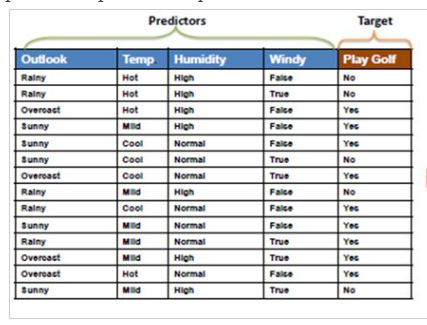

</div>


In [ ]:
%%R
EG=-5/(9+5)*log(5/(9+5),2)-9/(9+5)*log(9/(9+5),2)
EG

[1] 0.940286


Paso 1. Antes de realizar ninguna división por atributos, la entropía del sistema es:
<div class="figure">
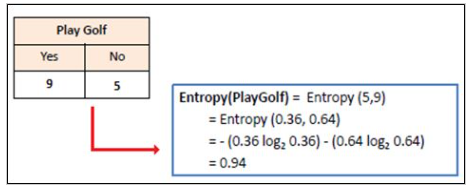

</div>


Paso 2. Calcula la ganancia que obtendríamos si hicieramos una división usando el primer atributo (Outlook):
<div class="figure">
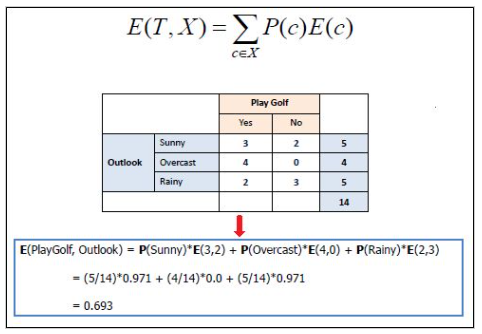

</div>


In [ ]:
%%R
print("Outlook")
print(((-3/(5)*log(3/5,2)-2/(5)*log(2/5,2))*5/14)*2)
print(EG-((-3/(5)*log(3/5,2)-2/(5)*log(2/5,2))*5/14)*2)

print("Temp")
print(EG-((-2/(4)*log(2/4,2)-2/(4)*log(2/4,2))*4/14 + (-4/(6)*log(4/6,2)-2/(6)*log(2/6,2))*6/14 + (-3/(4)*log(3/4,2)-1/(4)*log(1/4,2))*4/14))


[1] "Outlook"
[1] 0.6935361
[1] 0.2467498
[1] "Temp"
[1] 0.02922257


Paso 3. Se repite con cada uno de los atributos que tienen los ejemplos:
<div class="figure">
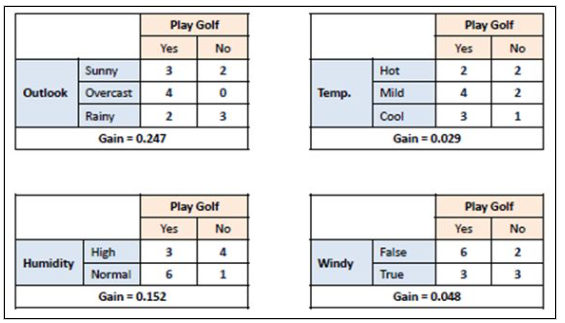

</div>


Paso 4. Se queda con el atributo que proporciona mayor ganancia (en este caso, Outlook), con lo que tenemos construido el primer paso del árbol de decisión, identificando el primer nodo de decisión:
<div class="figure">
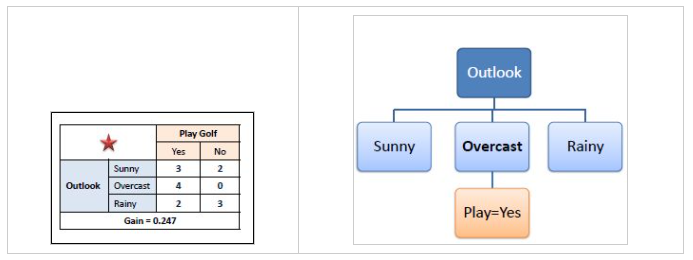

</div>


Paso 5. A continuación nos situamos en cada uno de los subconjuntos de ejemplos que define cada valor del atributo seleccionado y repetimos el proceso, construyendo poco a poco el árbol completo de decisión. Un nodo que tenga entropía nula se convierte en un nodo respuesta, ya que representa una muestra homogénea en el que la clasificación final es la misma para todos los ejemplos que contiene:
<div class="figure">
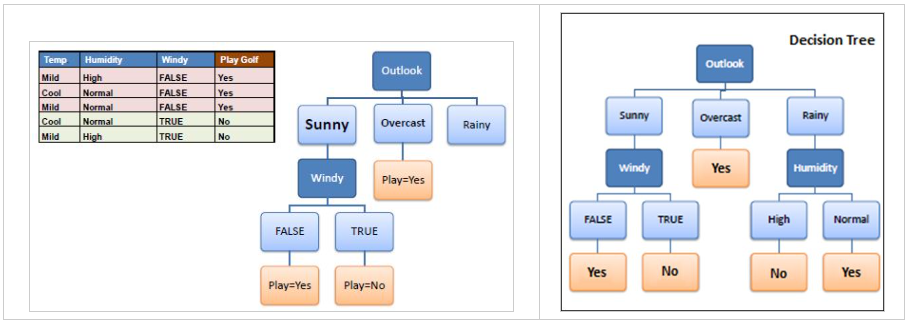

</div>


Uno de los aspectos más interesantes que nos ofrecen los árboles de decisión como máquinas de predicción es que nos permiten explicar porqué un determinado ejemplo se clasifica de una cierta forma, y podemos extraer un procedimiento que se implementa fácilmente en cualquier sistema haciendo uso de reglas condicionales.
<div class="figure">
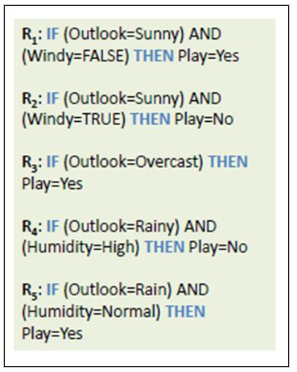

</div>


**Ventajas**
* Son fáciles de entender, interpretar y explicar
* No requieren de mucho trabajo previo en preparar la base de datos de entrenamiento
* Funcionan con datos numéricos y categóricos
* Trabajan con datos no lineales
* Se pueden hacer pruebas estadísticas sobre los resultados, lo cual da mayor confianza al modelo
* Es robusto, funciona incluso si los datos no cumplen con los supuestos
* Es escalable a bases de datos grandes

**Desventajas y limitaciones**
* Alcanzar un óptimo global es un problema, por lo tanto se utilizan heurísticas para encontrar la solución al problema de optimización
* Pequeños cambios en los datos puede resultar en cambios radicales en la segmentación del arbol
* Alta varianza
* El tamaño y complejidad del árbol puede ser muy alto

###Ejemplo. Arbol decision datos IRIS
**Separación en conjunto de entrenamiendo y prueba**
Al igual que en la clase anterior separemos la base de datos en el conjunto de entrenamiento y prueba.

In [ ]:
%%R
data(iris)
print(head(iris))
# Muestra del 80% del total

smp_size <- floor(0.80 * nrow(iris))

# fijar la semilla para que la muestra pueda ser reproducible
# 42 es la respuesta al sentido de la vida, el universo y todo lo demás

set.seed(42)

train_ind <- sample(seq_len(nrow(iris)), size = smp_size)

train <- iris[train_ind, ]
test <- iris[-train_ind, ]
print("tamaño de conjunto de entrenamiento:") 
print(nrow(train))
print("tamaño de conjunto de prueba:") 
print(nrow(test))

  Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1          5.1         3.5          1.4         0.2  setosa
2          4.9         3.0          1.4         0.2  setosa
3          4.7         3.2          1.3         0.2  setosa
4          4.6         3.1          1.5         0.2  setosa
5          5.0         3.6          1.4         0.2  setosa
6          5.4         3.9          1.7         0.4  setosa
[1] "tamaño de conjunto de entrenamiento:"
[1] 120
[1] "tamaño de conjunto de prueba:"
[1] 30


Calcular árbol de decisión

In [ ]:
%%R
part_tree <- rpart(Species ~ .,  data = train, method = "class",
                   minsplit = 5)

summary(part_tree)

Call:
rpart(formula = Species ~ ., data = train, method = "class", 
    minsplit = 5)
  n= 120 

          CP nsplit  rel error     xerror       xstd
1 0.50632911      0 1.00000000 1.17721519 0.05790361
2 0.44303797      1 0.49367089 0.65822785 0.06871292
3 0.02531646      2 0.05063291 0.10126582 0.03458886
4 0.01000000      3 0.02531646 0.07594937 0.03022110

Variable importance
 Petal.Width Petal.Length Sepal.Length  Sepal.Width 
          34           33           21           12 

Node number 1: 120 observations,    complexity param=0.5063291
  predicted class=setosa      expected loss=0.6583333  P(node) =1
    class counts:    41    39    40
   probabilities: 0.342 0.325 0.333 
  left son=2 (41 obs) right son=3 (79 obs)
  Primary splits:
      Petal.Length < 2.45 to the left,  improve=40.48966, (0 missing)
      Petal.Width  < 0.8  to the left,  improve=40.48966, (0 missing)
      Sepal.Length < 5.45 to the left,  improve=27.81444, (0 missing)
      Sepal.Width  < 3.15 to the righ

Visualizar el árbol

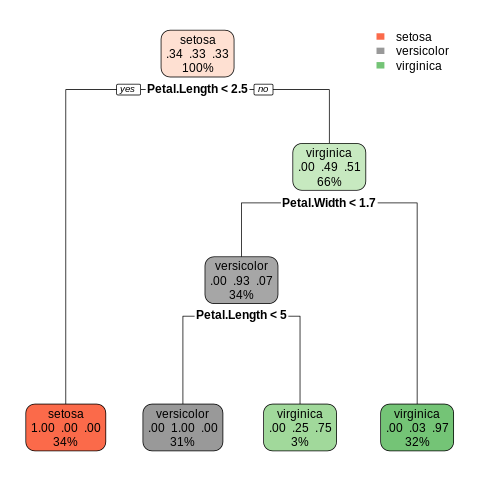

In [ ]:
%%R
rpart.plot(part_tree)

Importancia de cada parámetro

In [ ]:
%%R
part_tree$variable.importance

 Petal.Width Petal.Length Sepal.Length  Sepal.Width 
    72.47499     69.80221     44.92336     26.19314 


#### Ejercicio Datos IRIS Python

### Ejercicio de Crédito Banco Alemán

In [ ]:
%%R
credit <- read.table("AprendizMaquina/2023-1/Regresion/Datos/credit.txt")

credit=mutate(credit,V21=as.factor(V21))

cred_nam=c("Status of existing checking account","Duration in month","Credit history","Purpose","Credit amount","Present employment since","Installment rate in percentage of disposable income","Personal status and sex","Other debtors / guarantors","Present residence since","Property","A124 : unknown / no property","Age in years","Other installment plans","Housing","Number of existing credits at this bank","Job","Number of people being liable to provide maintenance for","Telephone","foreign worker", "V21")

names(credit)=cred_nam

names(credit)<-make.names(names(credit))

print(summary(credit))
# Define el numero total de renglones de los datos

n <- nrow(credit)

## Define el número de renglones para el conjunto de entrenamiento (80% de la base de datos) 

n_train <- round(n * .80) 

## Crea un vector de indices que sea el 80% de la muestra aleatoria

set.seed(2^25)

train_indices <- sample(seq_len(n), size = n_train)

# Obten el conjunto de indices para los datos de entrenamiento 

credit_train <- credit[train_indices,]#  
print("Tamaño datos entrenamiento:")
print(nrow(credit_train))
# Excluye los indices de entrenamiento para crear el conjunto de prueba

 credit_test <- credit[-train_indices, ]   
print("Tamaño datos prueba:")
print(nrow(credit_test))
# Utiliza el data frame de credit_train para con los datos de entrenamiento crear un arbol de decision



 Status.of.existing.checking.account Duration.in.month Credit.history    
 Length:1000                         Min.   : 4.0      Length:1000       
 Class :character                    1st Qu.:12.0      Class :character  
 Mode  :character                    Median :18.0      Mode  :character  
                                     Mean   :20.9                        
                                     3rd Qu.:24.0                        
                                     Max.   :72.0                        
   Purpose          Credit.amount   Present.employment.since
 Length:1000        Min.   :  250   Length:1000             
 Class :character   1st Qu.: 1366   Class :character        
 Mode  :character   Median : 2320   Mode  :character        
                    Mean   : 3271                           
                    3rd Qu.: 3972                           
                    Max.   :18424                           
 Installment.rate.in.percentage.of.disposable.income Pe

In [ ]:
%%R
summary(as.factor(credit$V21))
creditb=credit[credit$V21==1,]
creditm=credit[credit$V21==2,]

#Selección de muestra de entrenamiento de buenos (200)
tb <- sample(1:700,200)
credit_trainb <- creditb[tb,]
credit_testb <- creditb[-tb,]

#Selección de muestra de entrenamiento de malos (200)
tm <- sample(1:300,200)
credit_trainm <- creditm[tm,]
credit_testm <- creditm[-tm,]

credit_train=rbind(credit_trainb,credit_trainm)
credit_test=rbind(credit_testb,credit_testm)

print(nrow(credit_train))
print(nrow(credit_test))



[1] 400
[1] 600


Calcular el modelo 

n= 400 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 400 200 1 (0.5000000 0.5000000)  
   2) Status.of.existing.checking.account=A13,A14 156  42 1 (0.7307692 0.2692308)  
     4) Other.installment.plans=A143 129  28 1 (0.7829457 0.2170543) *
     5) Other.installment.plans=A141,A142 27  13 2 (0.4814815 0.5185185)  
      10) Purpose=A41,A43 9   2 1 (0.7777778 0.2222222) *
      11) Purpose=A40,A42,A46,A49 18   6 2 (0.3333333 0.6666667) *
   3) Status.of.existing.checking.account=A11,A12 244  86 2 (0.3524590 0.6475410)  
     6) Duration.in.month< 20.5 116  56 2 (0.4827586 0.5172414)  
      12) Purpose=A41,A43,A49 40  11 1 (0.7250000 0.2750000)  
        24) Number.of.existing.credits.at.this.bank>=1.5 10   0 1 (1.0000000 0.0000000) *
        25) Number.of.existing.credits.at.this.bank< 1.5 30  11 1 (0.6333333 0.3666667)  
          50) A124...unknown...no.property=A121,A122 23   5 1 (0.7826087 0.2173913) *
          51) A124...unknown...no.property=A12

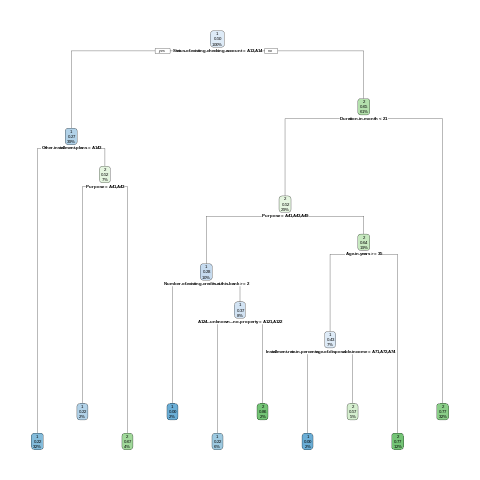

In [ ]:
%%R
# Define el modelo de entrenamiento

credit_model <- rpart(formula = as.factor(V21)~., 
                      data = credit_train, 
                      method = "class",parms = list(split = "information") )
rpart.plot(credit_model)
# Observa las salidas del modelo  

print(credit_model)

# Genera la clase de predicción para los datos de "credit_test"

# Utiliza la matriz de confusión para los datos prueba

# Genera el modelo de predicción
 class_prediction <- predict(object =credit_model,  
                        newdata = credit_test,   
                        type = "class")  

# Calcula la matriz de confusión para el conjunto de datos prueba
 confusionMatrix(as.factor(credit_test$V21), class_prediction)


In [ ]:
%%R
 class_prediction <- predict(object =credit_model,  
                        newdata = credit_test,   
                        type = "class")  
print(summary(as.factor(credit_test$V21)))
print(head(class_prediction))
# Calcula la matriz de confusión para el conjunto de datos prueba
 table(credit_test$V21, as.factor(class_prediction))

  1   2 
500 100 
 8 13 17 18 21 22 
 2  2  1  2  1  1 
Levels: 1 2
   
      1   2
  1 325 175
  2  28  72


#### Ejercicio Crédito Python

##Método de segmentación Gini
La idea de la segmentación del arbol es crear segmentaciones puras
<div class="figure">
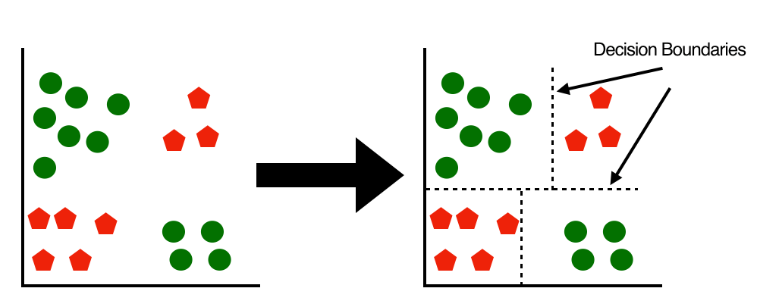

</div>


Sin embargo, esto no es posible, por lo que los algoritmos de segmentación del arbol crearan regiones lo mas puras posible.\
La segmentación de Gini busca obtener grupos mas homogeneos
<div class="figure">
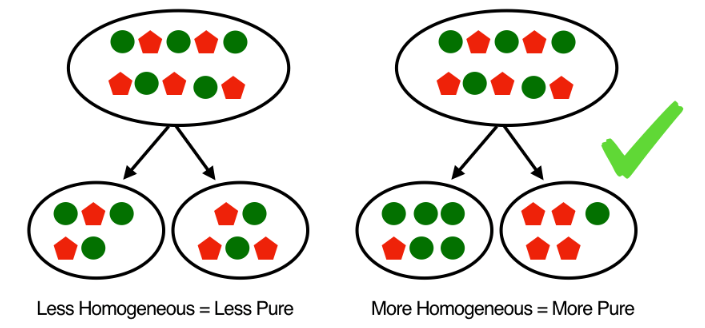

</div>


Por tanto, es una escala que permite medir que tan puro es el modelo.
<div class="figure">
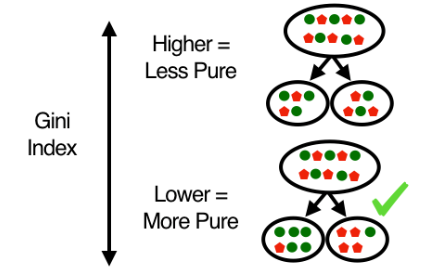

</div>


Entre mas puro es el modelo, menor sera el indice de Gini y viceversa.\
Ejemplo de datos de crédito con modelo de Gini.
Compara dos modelos que utilizan dos criterios diferentes (gini o information) y utiliza la validacion para escoger el mejor modelo de este grupo.

1. Modelo 1 con la condición split = gini

2. Modelo 2 con la condicion split = information

3. Genera predicciones sobre el conjunto de validaciones de ambos modelos

4. La clasificación del error “ce()” es la fracción incorrectamente clasificada de instancias. Computa y compara los datos prueba de ambos modelos.

Call:
rpart(formula = V21 ~ ., data = credit_train, method = "class", 
    parms = list(split = "gini"))
  n= 400 

      CP nsplit rel error xerror       xstd
1 0.3600      0     1.000  1.080 0.04983974
2 0.0450      1     0.640  0.655 0.04693013
3 0.0200      3     0.550  0.655 0.04693013
4 0.0150      4     0.530  0.715 0.04792638
5 0.0125      7     0.485  0.705 0.04777486
6 0.0100      9     0.460  0.715 0.04792638

Variable importance
                Status.of.existing.checking.account 
                                                 28 
                                            Purpose 
                                                 14 
                                  Duration.in.month 
                                                 11 
                           Present.employment.since 
                                                  9 
Installment.rate.in.percentage.of.disposable.income 
                                                  8 
                         

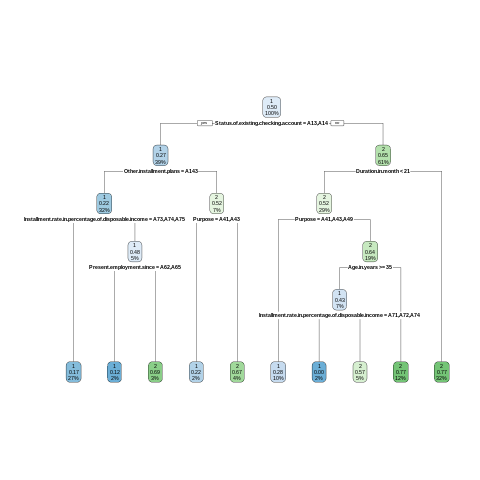

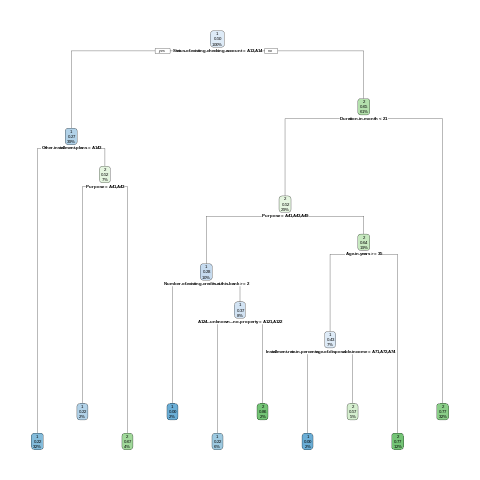

In [ ]:
%%R
 # Modelo Gini
 credit_model1 <- rpart(formula = V21 ~ ., 
                        data = credit_train, 
                        method = "class",
                        parms = list(split = "gini"))
 summary(credit_model1)
 rpart.plot(credit_model1)
 # Modelo information
 credit_model2 <- rpart(formula = V21 ~ ., 
                        data = credit_train, 
                        method = "class",
                        parms = list(split = "information"))
 rpart.plot(credit_model2)
 
 # Genera predicciones a partir del modelo de Gini
 pred1 <- predict(object =credit_model1,
                  newdata = credit_test,
                  type = "class")    
 
 # Genera predicciones a partir del modelo de Information
 pred2 <- predict(object =credit_model2,
                  newdata = credit_test,
                  type = "class")    
 
 # Comparacion de modelo clasificacion


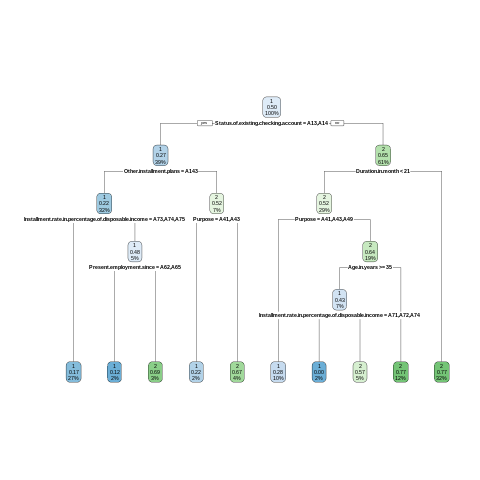

In [ ]:
%%R
rpart.plot(credit_model1)

In [ ]:
%%R
 print(confusionMatrix(as.factor(credit_test$V21), as.factor(pred1)))
 
 
 print(confusionMatrix(as.factor(credit_test$V21),as.factor(pred2)))

print( ce(actual = credit_test$V21, 
      predicted = pred1))
 print(ce(actual = credit_test$V21, 
      predicted = pred2))


     [,1] [,2]
[1,]    0    0
[2,]    0  500
     [,1] [,2]
[1,]    0    0
[2,]    0  500
[1] 0.365
[1] 0.3383333


#### Ejercicio Crédito Gini Python

## Árboles de Regresión
Los árboles de regresión sirven para cuando la salida no es una variable categórica, es decir, es numérica.
Las metricas de regresion mas comunes para evaluar el modelo son:


<div class="figure">
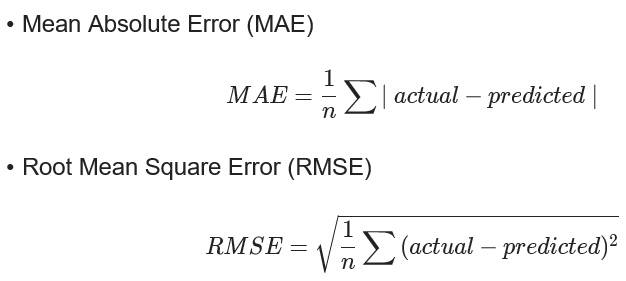

</div>


Estas metricas miden la distancia que existe entre el valor proyectado por el modelo versus el valor real.En ambos casos, mientras menor sea el valor de estas metricas, mejor sera el modelo de predicción.

### Ejercicio Estudiantes
Datos del Comportamiento de los estudiantes
El objetivo de estos datos es predecir la calificación del examen final de los estudiantes de matemáticas en base a las siguientes variables: sexo, edad, dirección, tiempo de estudio, materia optativa, educación de la familia, pago de extra clase e inasistencias. Para este caso la variable respuesta es la calificación final (numerica de 0 a 20). La información puede consultarse en:
https://archive.ics.uci.edu/ml/datasets/student+performance
En este ejercicio, se dividen los datos en: Entrenamiento (training), Validación (validation) y Prueba (test).
Se Introduce una nueva particion (validation) que sera utilizada para seleccionar el “mejor modelo” dentro de un conjunto de modelos.\
Durante el curso hemos demostrado diversas formas de separar la información en dos conjuntos mediante la función muestra (sample).\
Para este ejercicio se utilizara nuevamente la función sample, para separar la información en tres conjuntos.
Sin embargo, en lugar de muestrear los indices, se utilizara la función `sample()` para asignar a cada renglon dentro de alguno de los conjuntos utilizando una distribución de probabilidad.

Dividir la base en train, valid y test
Abrir los datos y segmentar la base de datos en: train, valid y test

In [ ]:
%%R
# Verificar que la tabla tiene 33 variables
grade_all <- read.csv("AprendizMaquina/2023-1/Regresion/Datos/student-mat.csv", header = TRUE,sep=";")


# Seleccionar solo 8 variables
grade <- select(grade_all,G1,age, address, studytime, schoolsup,famsup,paid, absences)

# Segmentar de forma aleatoria los renglones en 3 conjuntos: train (70%), valid (15%) y test (15%)
set.seed(1)
assignment <- sample(1:3, size = nrow(grade), prob = c(.70,.15,.15), replace = TRUE)

# Crear las bases de datos a partir de la segmentación anterior

grade_train <- grade[assignment == 1, ]    # subset the grade data frame to training indices only
grade_valid <- grade[assignment == 2, ]  # subset the grade data frame to validation indices only
grade_test <- grade[assignment == 3, ]   # subset the grade data frame to test indices only
print("n entrenamiento")
print(nrow(grade_train))
print("n prueba")
print(nrow(grade_valid))
print("n validación")
print(nrow(grade_test))

[1] "n entrenamiento"
[1] 282
[1] "n prueba"
[1] 57
[1] "n validación"
[1] 56


Se utilizara la tabla “grade_train”" para ajustar un árbol de regresión utilizando la paquetería `rpart()` y visualizarla con `rpart.plot()`. El arbol de regresion se vera identico a un arbol de clasificación con la excepcion de que tendra valores numericos en los nodos en lugar de clases de predicción.\
Para ajustar un arbol de decision es importante utilizar el metodo `class`, sin embargo para un arbol de regresión se debe utilizar el metodo ``anova``.

n= 282 

node), split, n, deviance, yval
      * denotes terminal node

  1) root 282 3210.44300 11.152480  
    2) schoolsup=yes 38  197.81580  9.289474 *
    3) schoolsup=no 244 2860.19700 11.442620  
      6) studytime< 2.5 189 2165.97900 11.010580  
       12) age>=16.5 107 1180.46700 10.551400  
         24) paid=no 64  779.43750 10.093750  
           48) famsup=yes 26  283.84620  9.076923  
             96) absences< 10 14   60.85714  7.285714 *
             97) absences>=10 12  125.66670 11.166670 *
           49) famsup=no 38  450.31580 10.789470 *
         25) paid=yes 43  367.67440 11.232560 *
       13) age< 16.5 82  933.51220 11.609760  
         26) famsup=yes 49  557.91840 11.040820  
           52) absences>=3 20  114.55000  9.850000  
            104) paid=yes 10   24.10000  8.300000 *
            105) paid=no 10   42.40000 11.400000 *
           53) absences< 3 29  395.44830 11.862070  
            106) studytime< 1.5 8   82.87500  8.875000 *
            107) studytim

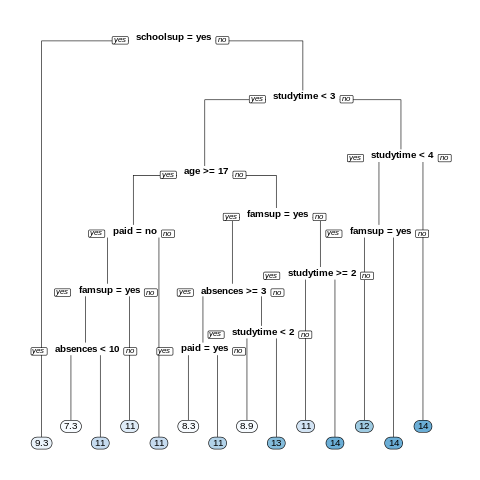

In [ ]:
%%R
# Modelo de entrenamiento
grade_model <- rpart(formula = G1 ~ ., 
                     data = grade_train, 
                     method = "anova")

# Ver la salida del modelo                     
print(grade_model)
# Grafica del arbol de decision
rpart.plot(x = grade_model, yesno = 2, type = 0, extra = 0)

Evaluar el modelo de árbol de regresión
* Paso.1 Predecir la calificación final de todos los estudiantes para el conjunto test.
* Paso 2. Evaluar el modelo con la metrica RMSE (Root Mean Squared Error). Esta métrica mide la distancia entre las valores proyectados con respecto a los valores reales.

In [ ]:
%%R
pred <- predict(object = grade_model,   # model objecto 
                newdata = grade_test)  # datos test 

# Calulo del RMSE
rmse(actual = grade_test[,1], 
     predicted = pred)

[1] 3.288132


#### Ejercicio Estudiantes Python

### Hiperparámetros del árbol de regresión
Los hiperparametros de un arbol de regresión se utiliza para ajustar mejor el arbol de decision.
En general se pueden hacer 3 tipos de ajuste:
> ``minslip`` = Establece el número minimo de datos requerido para crear la segmentación del nodo del arbol. Por default n = 20

> ``cp``= Parametro de complejidad que va de cero a uno. Entre mas pequeño sea este valor mas complejo sera el arbol(se incrementa el número de segmentos)

> ``maxdepth`` = Profundidad del arbol define el número del nodos del arbol. Por default $n = 30$

La librería ``rpart()`` calcula 10 escenarios de arbol variando el cp los cuales pueden ser analizados con la función ``plotcp()``, para este caso se elegira el valor cp cuyo xerror sea el mas pequeño.
Una vez definido el valor de cp se puede tunear el modelo con la función ``prune()``, el cual regresa el modelo optimizado.

**Tuneando el modelo**\
Utiliza la función ``prune`` y encuentra el mejor valor “CP” (Complexity Parameter)

          CP nsplit rel error    xerror       xstd
1 0.04811478      0 1.0000000 1.0062722 0.06608725
2 0.01852585      2 0.9037704 0.9624249 0.06415029
3 0.01826885      6 0.8296670 1.0193308 0.06897311
4 0.01728407      9 0.7748605 1.0370579 0.06924046
5 0.01496678     10 0.7575764 1.0655160 0.07232291
6 0.01107611     11 0.7426097 1.0223726 0.07294958
7 0.01000000     13 0.7204575 1.0178562 0.07376690


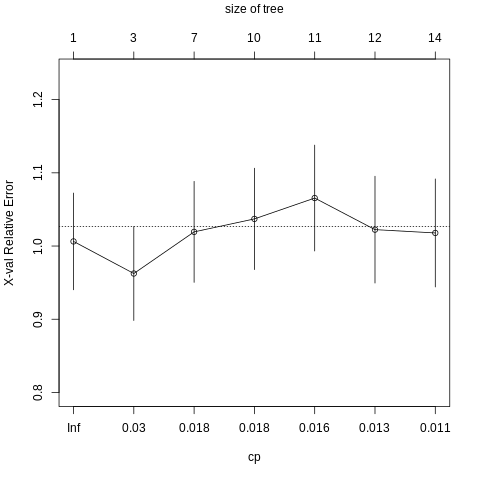

In [ ]:
%%R
# Gráfica de la tabla CP
plotcp(grade_model)
# Imprimir la tabla CP
print(grade_model$cptable)

Obtener el valor cp obtimo a partir de varios escenarios (cross-validated error)


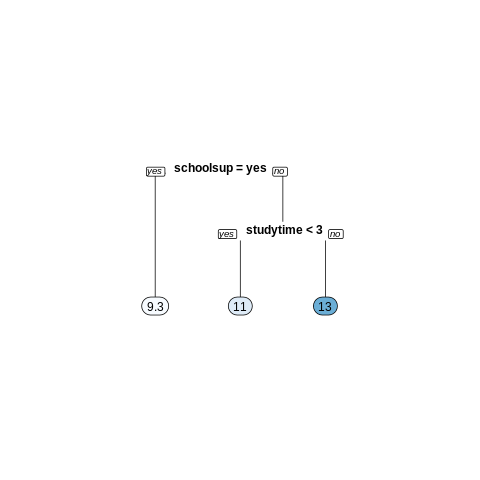

In [ ]:
%%R
opt_index <- which.min(grade_model$cptable[, "xerror"])
cp_opt <- grade_model$cptable[opt_index, "CP"]

# Tunear el modelo con el valor cp optimo
grade_model_opt <- prune(tree = grade_model, 
                         cp = cp_opt)
                          
# Grafica del modelo optimo
rpart.plot(x = grade_model_opt, yesno = 2, type = 0, extra = 0)

**Selección del Modelo**\
Modelar diferentes modelos con distintas combinaciones en sus hiperparametros es el objetivo durante la selección del modelo.\
Para elegir el mejor se debera elegir la metrica de medición que mejor aplique a cada caso particular), pr ejemplo: AUC y/o RMSE.\
Sin embargo, la elección de hiperparametros para efectuar la combinación solo se puede hacer de forma manual mediante la gunción expand.grid().

In [ ]:
%%R
# Establece una lista de posibles valores para minsplit y maxdepth
minsplit <- seq(1, 4, 1)
maxdepth <- seq(1, 6, 1)

# Crea u data frame que contenga todas las combinaciones  
hyper_grid <- expand.grid(minsplit = minsplit, maxdepth = maxdepth)

# Revisar la combinación de distintos modelos
print(head(hyper_grid)) 
# Imprimir el número de combinaciones o modelos
nrow(hyper_grid)

  minsplit maxdepth
1        1        1
2        2        1
3        3        1
4        4        1
5        1        2
6        2        2
[1] 24


En este apartado contruiremos un loop para entrenar los modelos u guardar los resultados en una lista llamada “grade_models”

In [ ]:
%%R
# Definir el numero de modelos

num_models <- nrow(hyper_grid)

# Crear una lista vacia para guardar los modelos

grade_models <- list()

# Escribir un loop sobre los renglones de los modelos
for (i in 1:num_models) {

    # Obtener los valores deminsplit, maxdepth  para cada renglon i
    minsplit <- hyper_grid$minsplit[i]
    maxdepth <- hyper_grid$maxdepth[i]

    # Entrena el modelo y guardarlo en la lista grade_models
    grade_models[[i]] <- rpart(formula = G1 ~ ., 
                               data = grade_train, 
                               method = "anova",
                               minsplit = minsplit,
                               maxdepth = maxdepth)
}

En esta sección se utiliza la tabla de validación (validation) para evaluar el performance de un conjunto de modelos con el fin de obtener el mejor modelo del grupo.
Todos los modelos del grupo con evaluados con la misma base de validación y el que tenga mejor performance sera considerado como ganador.\
Una vez que se obtiene el mejor modelo, una estimacion final del performance es computado sobre la base de prueba (test)\
La tabla de datos de prueba (test) solo debe utilizarse para estimar el performance y no en la selección del modelo.

In [ ]:
%%R
# Numero potencial de modelos
num_models <- length(grade_models)

# Crea un vector vacio para guardar los resultados del RMSE
rmse_values <- c()

# Escribe un loop sobre el modelo para guardar los valores RMSE
for (i in 1:num_models) {

    # Actualiza el i - esimo modelo de la lista
    model <- grade_models[[i]]
    
    # Genera predicciones
    pred <- predict(object = model,
                    newdata = grade_valid)
    
    # Calcula el valor de RMSE
    rmse_values[i] <- rmse(actual = grade_valid$G1, 
                           predicted = pred)
}

# Identifica el modelo con el menor RMSE 
best_model <- grade_models[[which.min(rmse_values)]]

# Imprime los parametros del mejor modelo
best_model$control

$minsplit
[1] 2

$minbucket
[1] 1

$cp
[1] 0.01

$maxcompete
[1] 4

$maxsurrogate
[1] 5

$usesurrogate
[1] 2

$surrogatestyle
[1] 0

$maxdepth
[1] 2

$xval
[1] 10



Calcula el RMSE de la base de datos prueba (train) 

In [ ]:
%%R
# Calcula el RMSE de la base de datos prueba (train) 
pred <- predict(object = best_model,
                newdata = grade_test)
rmse(actual = grade_test$G1, 
     predicted = pred)

[1] 3.040211


#### Ejercicio Hiperpámetros Python

#Máquinas de Soporte Vectorial (*Support Vector Machine*)

**Introducción**

El método de clasificación-regresión Máquinas de Vector Soporte (Support Vector Machines, SVMs) fue desarrollado en la década de los 90, dentro de campo de la ciencia computacional. Si bien originariamente se desarrolló como un método de clasificación binaria, su aplicación se ha extendido a problemas de clasificación múltiple y regresión. SVMs ha resultado ser uno de los mejores clasificadores para un amplio abanico de situaciones, por lo que se considera uno de los referentes dentro del ámbito de aprendizaje estadístico y machine learning.

Las Máquinas de Vector Soporte se fundamentan en el Maximal Margin Classifier, que a su vez, se basa en el concepto de hiperplano. A lo largo de este ensayo se introducen por orden cada uno de estos conceptos. Comprender los fundamentos de las SVMs requiere de conocimientos sólidos en álgebra lineal. En este ensayo no se profundiza en el aspecto matemático, pero puede encontrarse una descripción detallada en el libro Support Vector Machines Succinctly by Alexandre Kowalczyk

En R, las librerías ``e1071`` y ``LiblineaR`` contienen los algoritmos necesarios para obtener modelos de clasificación simple, múltiple y regresión, basados en Support Vector Machines.

**Hiperplano y Maximal Margin Classifier**


En un espacio $p$-dimensional, un hiperplano se define como un subespacio plano y afín de dimensiones $p−1$. El término afín significa que el subespacio no tiene por qué pasar por el origen. En un espacio de dos dimensiones, el hiperplano es un subespacio de 1 dimensión, es decir, una recta. En un espacio tridimensional, un hiperplano es un subespacio de dos dimensiones, un plano convencional. Para dimensiones p>3 no es intuitivo visualizar un hiperplano, pero el concepto de subespacio con $p−1$ dimensiones se mantiene.

La definición matemática de un hiperplano es bastante simple. En el caso de dos dimensiones, el hiperplano se describe acorde a la ecuación de una recta:
$$\beta_0 + \beta_1x_1 + \beta_2x_2 = 0$$


Dados los parámetros $β_0$, $β_1$ y $β_2$, todos los pares de valores $x=(x_1,x_2)$ para los que se cumple la igualdad son puntos del hiperplano. Esta ecuación puede generalizarse para $p$-dimensiones:
$$\beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_px_p = 0$$
y de igual manera, todos los puntos definidos por el vector $(x=x_1,x_2,...,x_p)$ que cumplen la ecuación pertenecen al hiperplano.

Cuando $x$ no satisface la ecuación:
$$\beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_px_p < 0$$
o bien 
$$\beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_px_p > 0$$

el punto $x$ cae a un lado o al otro del hiperplano. Así pues, se puede entender que un hiperplano divide un espacio $p$-dimensional en dos mitades. Para saber en qué lado del hiperplano se encuentra un determinado punto $x$, solo hay que calcular el signo de la ecuación.

La siguiente imagen muestra el hiperplano de un espacio bidimensional. La ecuación que describe el hiperplano (una recta) es $1+2x_1+3x_2=0$. La región azul representa el espacio en el que se encuentran todos los puntos para los que $1+2x_1+3x_2>0$ y la región roja el de los puntos para los que $1+2x_1+3x_2<0$.


<div class="figure">
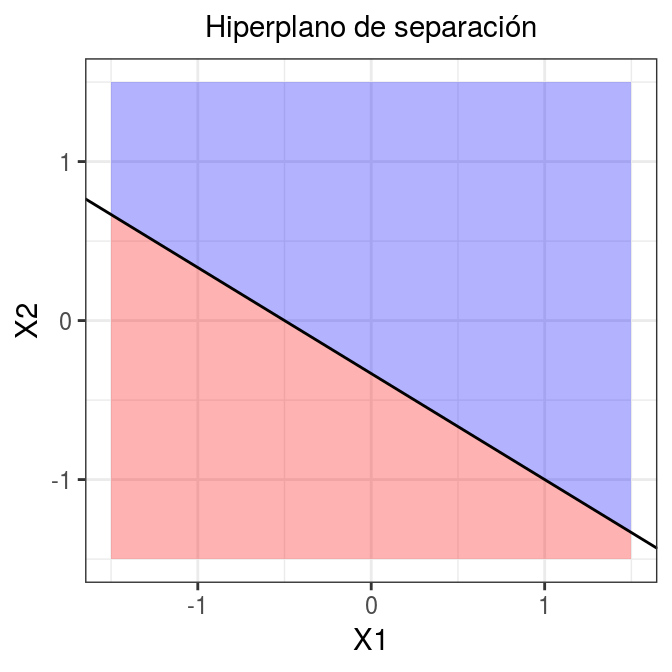

**Clasificación binaria empleando un hiperplano**


Cuando se dispone de $n$ observaciones, cada una con $p$ predictores y cuya variable respuesta tiene dos niveles (de aquí en adelante identificados como $+1$ y $−1$), se pueden emplear hiperplanos para construir un clasificador que permita predecir a que grupo pertenece una observación en función de sus predictores. Este mismo problema puede abordarse también con otros métodos (regresión logística, LDA, árboles de clasificación…) cada uno con ventajas y desventajas.

Para facilitar la comprensión, las siguientes explicaciones se basan en un espacio de dos dimensiones, donde un hiperplano es una recta. Sin embargo, los mismos conceptos son aplicables a dimensiones superiores.

**CASOS PERFECTAMENTE SEPARABLES LINEALMENTE**

Si la distribución de las observaciones es tal que se pueden separar linealmente de forma perfecta en las dos clases ($+1$ y $−1$), entonces, un hiperplano de separación cumple que:
$$\beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_px_p > 0, \ si \ y_i=1$$
$$\beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_px_p < 0, \ si \ y_i=-1$$

Al identificar cada clase como $+1$ o $−1$, y dado que multiplicar dos valores negativos resultan en un valor positivo, las dos condiciones anteriores pueden simplificarse en una única:
$$y_i(\beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_px_p) > 0, \ \textrm{ para } \ i = 1 ... n$$

Bajo este escenario, el clasificador más sencillo consiste en asignar cada observación a una clase dependiendo del lado del hiperplano en el que se encuentre. Es decir, la observación $\textbf{$x^*$}$ se clasifica acorde al signo de la función $f(\textbf{$x^\ast$}) = \beta_0 + \beta_1x^\ast_1 + \beta_2x^\ast_2 + ... + \beta_px^\ast_p$. Si $f(x^\ast)$ es positiva, la observación se asigna a la clase $+1$, si es negativa, a la clase $−1$. Además, la magnitud de $f(x^\ast)$ permite saber cómo de lejos está la observación del hiperplano y con ello la confianza de la clasificación.

La definición de hiperplano para casos perfectamente separables linealmente resulta en un número infinito de posibles hiperplanos, lo que hace necesario un método que permita seleccionar uno de ellos como clasificador óptimo.


<div class="figure">
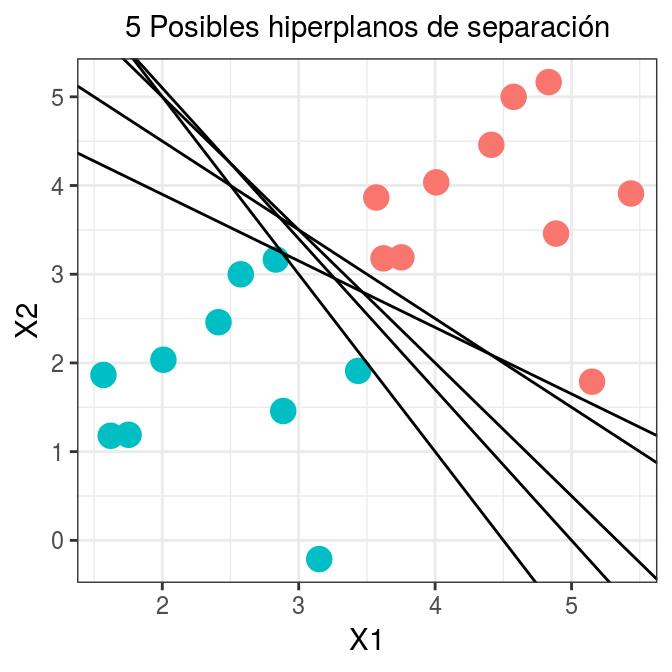

La solución a este problema consiste en seleccionar como clasificador óptimo al que se conoce como *maximal margin hyperplane o hiperplano óptimo de separación*, que se corresponde con el hiperplano que se encuentra más alejado de todas las observaciones de entrenamiento. Para obtenerlo, se tiene que calcular la distancia perpendicular de cada observación a un determinado hiperplano. La menor de estas distancias (conocida como margen) determina como de alejado está el hiperplano de las observaciones de entrenamiento. El maximal margin hyperplane se define como el hiperplano que consigue un mayor margen, es decir, que la distancia mínima entre el hiperplano y las observaciones es lo más grande posible. Aunque esta idea suena razonable, no es posible aplicarla, ya que habría infinitos hiperplanos contra los que medir las distancias. En su lugar, se recurre a métodos de optimización. Para encontrar una descripción más detallada de la solución por optimización consultar (*Support Vector Machines Succinctly by Alexandre Kowalczyk*).

<div class="figure">
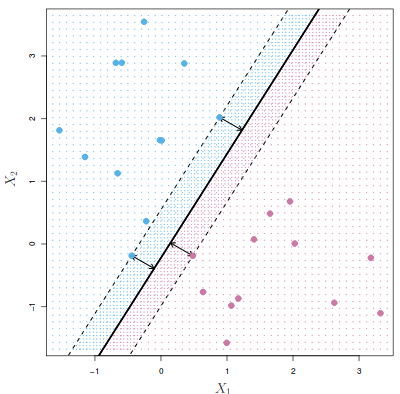


La imagen anterior muestra el maximal margin hyperplane para un conjunto de datos de entrenamiento. Las tres observaciones equidistantes respecto al maximal margin hyperplane se encuentran a lo largo de las líneas discontinuas que indican la anchura del margen. A estas observaciones se les conoce como vectores soporte, ya que son vectores en un espacio p-dimensional y soportan (definen) el maximal margin hyperplane. Cualquier modificación en estas observaciones (vectores soporte) conlleva cambios en el maximal margin hyperplane. Sin embargo, modificaciones en observaciones que no son vector soporte no tienen impacto alguno en el hiperplano.

*CASOS CUASI-SEPARABLES LINEALMENTE*

El maximal margin hyperplane descrito en el apartado anterior es una forma muy simple y natural de clasificación siempre y cuando exista un hiperplano de separación. En la gran mayoría de casos reales, los datos no se pueden separar linealmente de forma perfecta, por lo que no existe un hiperplano de separación y no puede obtenerse un maximal margin hyperplane.

<div class="figure">
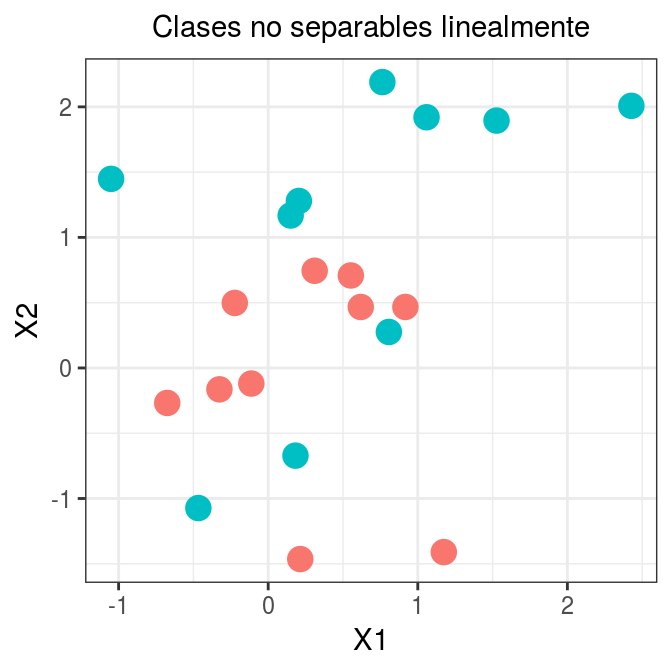


Para solucionar estas situaciones, se puede extender el concepto de *maximal margin hyperplane* para obtener un hiperplano que casi separe las clases, pero permitiendo que cometa unos pocos errores. A este tipo de hiperplano se le conoce como *Support Vector Classifier o Soft Margin*

##Support Vector Classifier o Soft Margin SVM


El Maximal Margin Classifier descrito en la sección anterior tiene poca aplicación práctica, ya que rara vez se encuentran casos en los que las clases sean perfecta y linealmente separables. De hecho, incluso cumpliéndose estas condiciones ideales, en las que exista un hiperplano capaz de separar perfectamente las observaciones en dos clases, esta aproximación sigue presentando dos inconvenientes:

Dado que el hiperplano tiene que separar perfectamente las observaciones, es muy sensible a variaciones en los datos. Incluir una nueva observación puede suponer cambios muy grandes en el hiperplano de separación (poca robustez).

Que el maximal margin hyperplane se ajuste perfectamente a las observaciones de entrenamiento para separarlas todas correctamente suele conllevar problemas de overfitting.

Por estas razones, es preferible crear un clasificador basado en un hiperplano que, aunque no separe perfectamente las dos clases, sea más robusto y tenga mayor capacidad predictiva al aplicarlo a nuevas observaciones (menos problemas de overfitting). Esto es exactamente lo que consiguen los clasificadores de vector soporte, también conocidos como soft margin classifiers o Support Vector Classifiers. Para lograrlo, en lugar de buscar el margen de clasificación más ancho posible que consigue que las observaciones estén en el lado correcto del margen; se permite que ciertas observaciones estén en el lado incorrecto del margen o incluso del hiperplano.

La siguiente imagen muestra un clasificador de vector soporte ajustado a un pequeño set de observaciones. La línea continua representa el hiperplano y las líneas discontinuas el margen a cada lado. Las observaciones 2, 3, 4, 5, 6, 7 y 10 se encuentran en el lado correcto del margen (también del hiperplano) por lo que están bien clasificadas. Las observaciones 1 y 8, a pesar de que se encuentran dentro del margen, están en el lado correcto del hiperplano, por lo que también están bien clasificadas. Las observaciones 11 y 12, se encuentran en el lado erróneo del hiperplano, su clasificación es incorrecta. Todas aquellas observaciones que, estando dentro o fuera del margen, se encuentren en el lado incorrecto del hiperplano, se corresponden con observaciones de entrenamiento mal clasificadas.

<div class="figure">
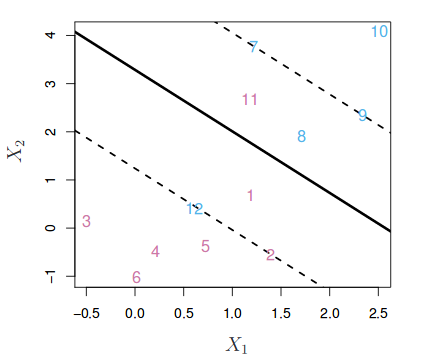


La identificación del hiperplano de un clasificador de vector soporte, que clasifique correctamente la mayoría de las observaciones a excepción de unas pocas, es un problema de optimización convexa. Si bien la demostración matemática queda fuera del objetivo de esta introducción, es importante mencionar que el proceso incluye un hiperparámetro de tuning $C$. $C$ controla el número y severidad de las violaciones del margen (y del hiperplano) que se toleran en el proceso de ajuste. Si $C=\infty$, no se permite ninguna violación del margen y por lo tanto, el resultado es equivalente al Maximal Margin Classifier (teniendo en cuenta que esta solución solo es posible si las clases son perfectamente separables). Cuando más se aproxima $C$ a cero, menos se penalizan los errores y más observaciones pueden estar en el lado incorrecto del margen o incluso del hiperplano. $C$ es a fin de cuentas el hiperparámetro encargado de controlar el balance entre bias y varianza del modelo. En la práctica, su valor óptimo se identifica mediante cross-validation.

El proceso de optimización tiene la peculiaridad de que solo las observaciones que se encuentran justo en el margen o que lo violan influyen sobre el hiperplano. A estas observaciones se les conoce como vectores soporte y son las que definen el clasificador obtenido. Esta es la razón por la que el parámetro $C$ controla el balance entre bias y varianza. Cuando el valor de $C$ es pequeño, el margen es más ancho, y más observaciones violan el margen, convirtiéndose en vectores soporte. El hiperplano está, por lo tanto, sustentado por más observaciones, lo que aumenta el bias pero reduce la varianza. Cuando mayor es el valor de $C$, menor el margen, menos observaciones serán vectores soporte y el clasificador resultante tendrá menor bias pero mayor varianza.

Otra propiedad importante que deriva de que el hiperplano dependa únicamente de una pequeña proporción de observaciones (vectores soporte), es su robustez frente a observaciones muy alejadas del hiperplano. Esto hace al método de clasificación vector soporte distinto a otros métodos tales como Linear Discrimiant Analysis (LDA), donde la regla de clasificación depende de la media de todas las observaciones.

### Ejemplo

Para mostrar el uso de un Support Vector Classifier como clasificador binario, se simulan observaciones en un espacio bidimensional que pertenecen a dos clases. Este ejemplo se ha obtenido de los videos asociados al libro Introduction to Statistical Learning, que no es igual al presentado en el libro.

En los siguientes ejemplos, se emplea la función ``svm()`` contenida en el paquete ``e1071``. Esta función ajusta Support Vector Classifier si se le especifica el argumento ``kernel="linear"`` (como se describe más adelante, el método de Support Vector Machines es equivalente al Support Vector Classifier cuando el kernel utilizado es lineal). El argumento cost determina la penalización aplicada por violar el margen, es el nombre que emplea esta función para el hiperparámetro $C$.

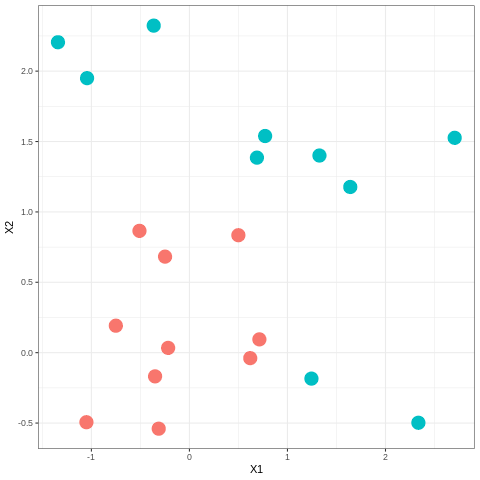

In [ ]:
%%R
set.seed(10111)
coordenadas <- matrix(rnorm(40), 20, 2)
colnames(coordenadas) <- c("X1","X2")
y <- c(rep(-1,10), rep(1,10))
coordenadas[y == 1, ] <- coordenadas[y == 1, ] + 1
datos <- data.frame(coordenadas, y)
ggplot(data = datos, aes(x = X1, y = X2, color = as.factor(y))) +
  geom_point(size = 6) +
  theme_bw() +
  theme(legend.position = "none")

La representación gráfica de los datos muestra que los grupos no son linealmente separables.

La función ``svm()`` identifica automáticamente si se trata de un problema de clasificación, la variable respuesta es de tipo factor, o de regresión, la variable respuesta es tipo numérico.

In [ ]:
%%R
# Se convierte la variable respuesta a factor
datos$y <- as.factor(datos$y)

# Para que la función svm() calcule el Support Vector Classifier,
# se tiene que indicar que la función kernel es lineal.
modelo_svm <- svm(formula = y ~ X1 + X2, data = datos, kernel = "linear",
                  cost = 10, scale = FALSE)

IMPORTANTE: En este caso, ambos predictores (X1, X2) tienen la misma escala por lo que no es necesario estandarizarlos. En aquellas situaciones en las que las escalas son distintas, sí hay que estandarizarlos, de lo contrario, los predictores de mayor magnitud eclipsarán a los de menor magnitud.

El ``summary`` del modelo muestra que hay un total de 6 vectores soporte, 3 pertenecen a una clase y 3 a la otra.

In [ ]:
%%R
print(summary(modelo_svm))
# Índice de las observaciones que actúan como vector soporte
modelo_svm$index


Call:
svm(formula = y ~ X1 + X2, data = datos, kernel = "linear", cost = 10, 
    scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 

Number of Support Vectors:  6

 ( 3 3 )


Number of Classes:  2 

Levels: 
 -1 1



[1]  1  4 10 14 16 20


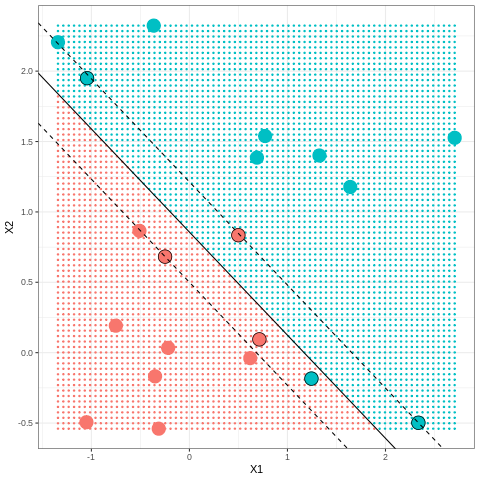

In [ ]:
%%R
# SI AL AJUSTAR EL MODELO SE INDICA scale = true, SE TIENEN QUE ESTANDARIZAR
# TAMBIÉN LAS OBSERVACIONES PARA QUE COINCIDAN LAS COORDENADAS.

# Se interpolar puntos dentro del rango de los dos predictores X1 y X2.
# Estos nuevos puntos se emplean para predecir la variable respuesta acorde
# al modelo y así colorear las regiones que separa el hiperplano.

# Rango de los predictores
rango_X1 <- range(datos$X1)
rango_X2 <- range(datos$X2)

# Interpolación de puntos
new_x1 <- seq(from = rango_X1[1], to = rango_X1[2], length = 75)
new_x2 <- seq(from = rango_X2[1], to = rango_X2[2], length = 75)
nuevos_puntos <- expand.grid(X1 = new_x1, X2 = new_x2)

# Predicción según el modelo
predicciones <- predict(object = modelo_svm, newdata = nuevos_puntos)

# Se almacenan los puntos predichos para dar color a las regiones
color_regiones <- data.frame(nuevos_puntos, y = predicciones)

# Para extraer la ecuación del hiperplano y del margen es necesario aplicar 
# algebra lineal.
beta <- drop(t(modelo_svm$coefs) %*% as.matrix(datos[,c("X1","X2")])[modelo_svm$index,])
beta0 <- modelo_svm$rho


ggplot() +
  # Representación de las 2 regiones empleando los puntos y coloreándolos
  # según la clase predicha por el modelo
  geom_point(data = color_regiones, aes(x = X1, y = X2, color = as.factor(y)),
             size = 0.5) +
  # Se añaden las observaciones
  geom_point(data = datos, aes(x = X1, y = X2, color = as.factor(y)),
             size = 6) +
  # Se identifican aquellas observaciones que son vectores soporte del modelo
  geom_point(data = datos[modelo_svm$index, ],
             aes(x = X1, y = X2, color = as.factor(y)),
             shape = 21, colour = "black",
             size = 6) +
  # Se añaden las rectas del hiperplano y los márgenes
  geom_abline(intercept = beta0/beta[2], slope = -beta[1]/beta[2]) +
  geom_abline(intercept = (beta0 - 1)/beta[2], slope = -beta[1]/beta[2],
              linetype = "dashed") +    
  geom_abline(intercept = (beta0 + 1)/beta[2], slope = -beta[1]/beta[2],
              linetype = "dashed") +
  theme_bw() +
  theme(legend.position = "none")

En el ajuste anterior se ha empleado un valor del hiperparámetro de penalización ``cost = 10``. Este hiperparámetro determina el balance bias-varianza y por lo tanto, es crítico para la capacidad predictiva del modelo. El paquete e1071 incluye la función ``tune()`` que realiza 10-cross-validation para identificar el valor óptimo de penalización. Entre sus argumentos están: el modelo svm y un vector ranges con los valores de los hiperparámetros que se quieren evaluar.

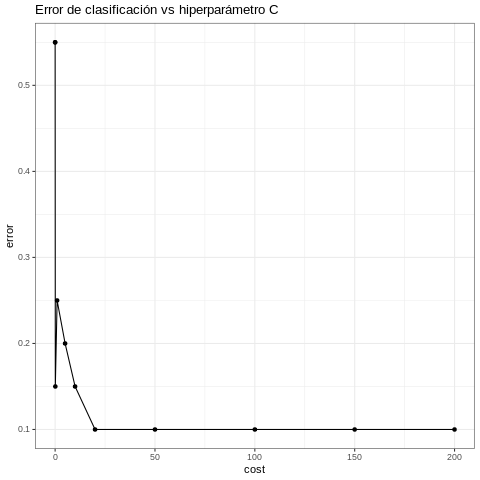

In [ ]:
%%R
set.seed(1)
svm_cv <- tune("svm", y ~ X1 + X2, data = datos,
               kernel = 'linear',
               ranges = list(cost = c(0.001, 0.01, 0.1, 1, 5, 10, 20, 50, 100,
                                      150, 200)))
summary(svm_cv)

ggplot(data = svm_cv$performances, aes(x = cost, y = error)) +
  geom_line() +
  geom_point() +
  labs(title = "Error de clasificación vs hiperparámetro C") +
  theme_bw()

El proceso de cross-validation muestra que el valor de penalización con el que se consigue menor error rate es 20 o superior. La función ``tune()`` almacena el mejor modelo de entre todos los que se han comparado.\
Una vez obtenido el modelo final(usando ``$bestmodel``), se puede predecir la clase a la que pertenecen nuevas observaciones empleando la función ``predict()``.

In [ ]:
%%R
mejor_modelo <- svm_cv$best.model
print(mejor_modelo)
# Datos de test simulados
set.seed(19)
coordenadas <- matrix(rnorm(40), 20, 2)
colnames(coordenadas) <- c("X1","X2")
y <- sample(c(-1,1), 20, rep = TRUE)
coordenadas[y == 1, ] <- coordenadas[y == 1, ] + 1
test <- data.frame(coordenadas, y)

# Predicciones
predicciones <- predict(object = mejor_modelo, test)
print(paste("Error de test:", 100*mean(test$y != predicciones),"%"))
table(predicción = predicciones, valor_real = test$y)


Call:
best.tune(method = "svm", train.x = y ~ X1 + X2, data = datos, ranges = list(cost = c(0.001, 
    0.01, 0.1, 1, 5, 10, 20, 50, 100, 150, 200)), kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  20 

Number of Support Vectors:  6

[1] "Error de test: 15 %"
          valor_real
predicción -1  1
        -1 10  0
        1   3  7


##Máquinas de Vector Soporte
El Support Vector Classifier descrito en los apartados anteriores consigue buenos resultados cuando el límite de separación entre clases es aproximadamente lineal. Si no lo es, su capacidad decae drásticamente. Una estrategia para enfrentarse a escenarios en los que la separación de los grupos es de tipo no lineal consiste en expandir las dimensiones del espacio original.

El hecho de que los grupos no sean linealmente separables en el espacio original no significa que no lo sean en un espacio de mayores dimensiones. Las imágenes siguientes muestran como dos grupos, cuya separación en dos dimensiones no es lineal, sí lo es al añadir una tercera dimensión.

<div class="figure">
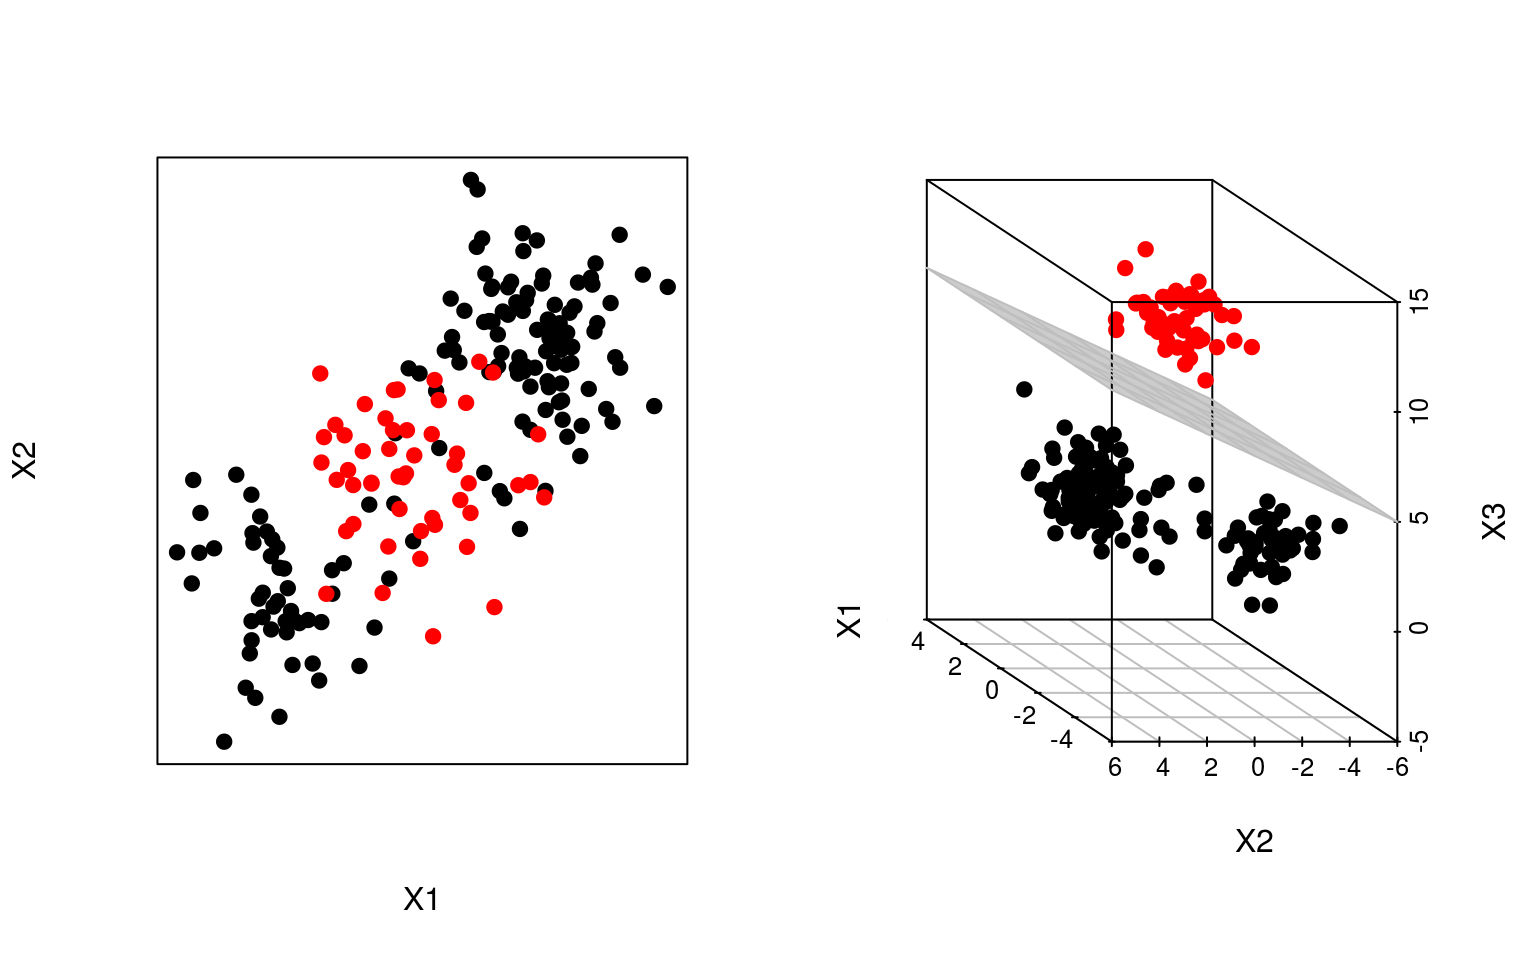


<div class="figure">
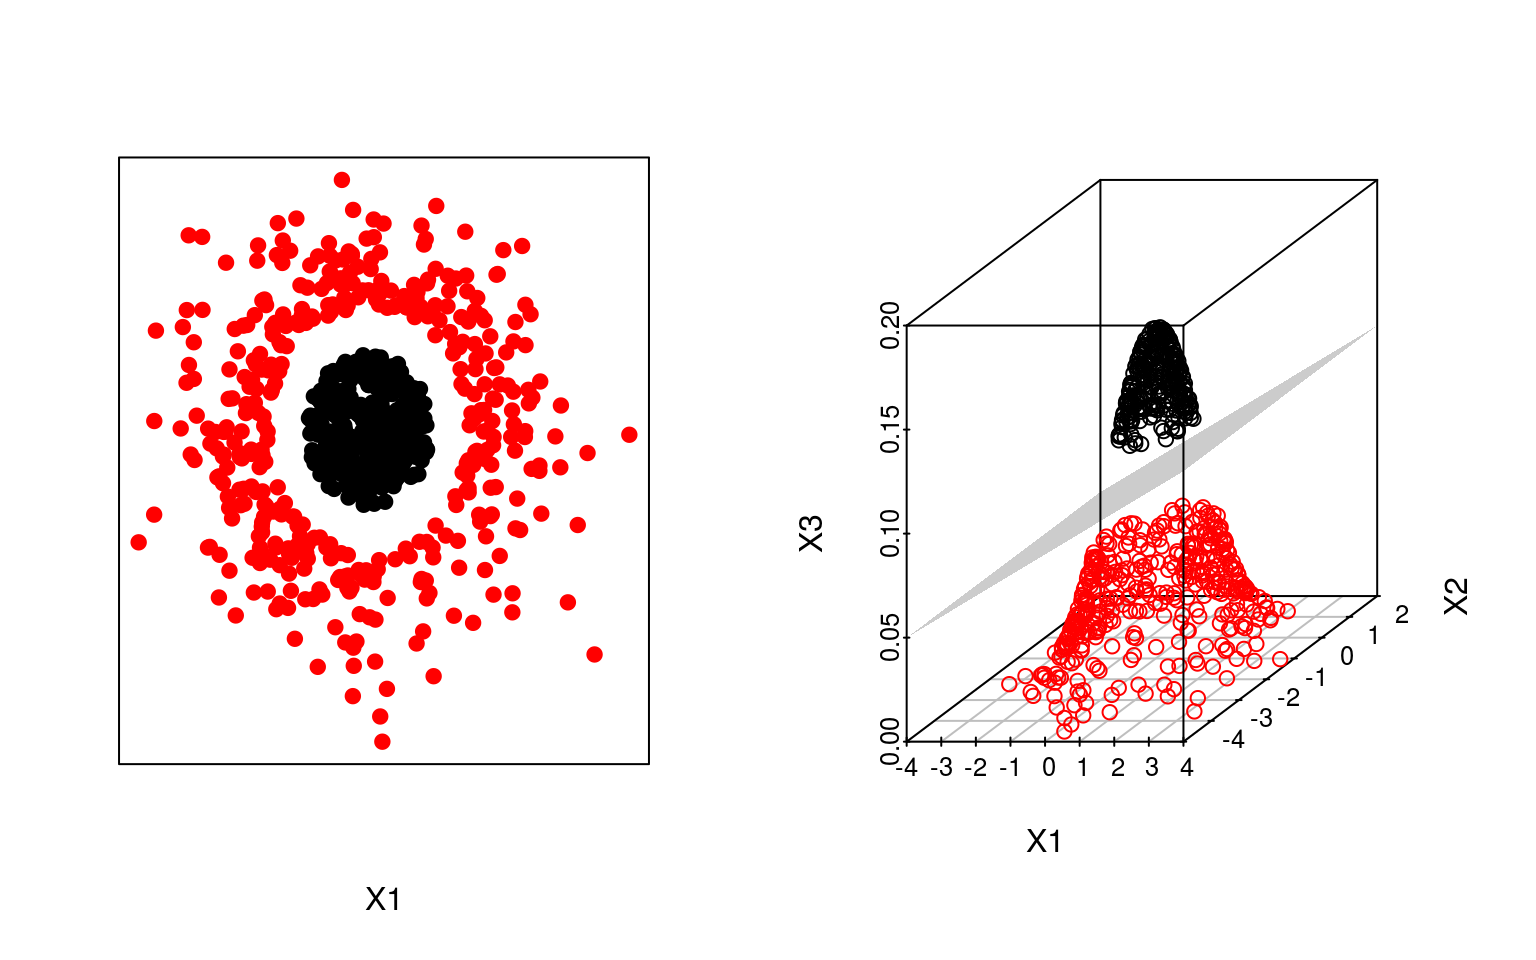

El método de Máquinas Vector Soporte (SVM) se puede considerar como una extensión del Support Vector Classifier obtenida al aumentar la dimensión de los datos. Los límites de separación lineales generados en el espacio aumentado se convierten en límites de separación no lineales al proyectarlos en el espacio original.

### Aumento en la dimensión, kernels
Una vez definido que las Máquinas de Vector Soporte siguen la misma estratégica que el Support Vector Classifier, pero aumentando la dimensión de los datos antes de aplicar el algoritmo, la pregunta inmediata es ¿Cómo se aumenta la dimensión y qué dimensión es la correcta?

La dimensión de un conjunto de datos puede transformarse combinando o modificando cualquiera de sus dimensiones. Por ejemplo, se puede transformar un espacio de dos dimensiones en uno de tres aplicando la siguiente función:
$$f(x_1,x_2) = (x_1^2, \sqrt{2}x_1x_2, x_2^2)$$

Esta es solo una de las infinitas trasformaciones posibles, ¿Cómo saber cuál es la adecuada? Es aquí donde los kernel entran en juego. Un kernel ($K$) es una función que devuelve el resultado del dot product entre dos vectores realizado en un nuevo espacio dimensional distinto al espacio original en el que se encuentran los vectores. Aunque no se ha entrado en detalle en las fórmulas matemáticas empleadas para resolver el problema de optimización, esta contiene un dot product (producto punto). Si se sustituye este dot product por un kernel, se obtienen directamente los vectores soporte (y el hiperplano) en la dimensión correspondiente al kernel. Ha esto se le suele conocer como kernel trick, porque, con solo una ligera modificación del problema original, gracias a los kernels, se puede obtener el resultado para cualquier dimensión. Existen multitud de kernels distintos, algunos de los más utilizados son:\
**Kernel lineal**\
$$K(\textbf{x}, \textbf{x'}) = \textbf{x} \cdot \textbf{x'}$$
Si se emplea un Kernel lineal, el clasificador *Support Vector Machine* obtenido es equivalente al *Support Vector Classifier*.

<div class="figure">
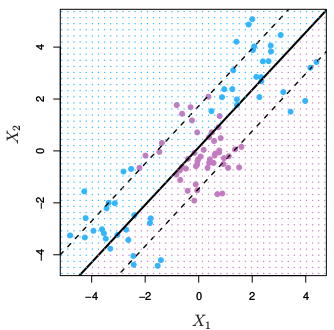


**Kernel polinómico**

$$K(\textbf{x}, \textbf{x'}) = (\textbf{x} \cdot \textbf{x'} + c) ^ d$$

Cuando se emplea $d=1$ y $c=0$, el resultado es el mismo que el de un kernel lineal. Si $d>1$, se generan límites de decisión no lineales, aumentando la no linealidad a medida que aumenta d. No suele ser recomendable emplear valores de $d$ mayores 5 por problemas de overfitting.

<div class="figure">
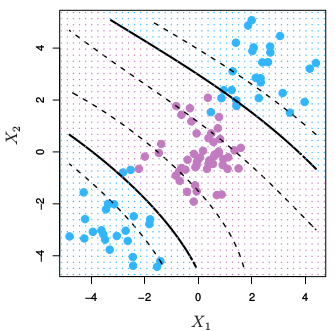


**Gaussian Kernel (RBF)**

$K(\textbf{x}, \textbf{x'}) = exp(- \gamma ||\textbf{x} - \textbf{x'}||^2)$

<div class="figure">
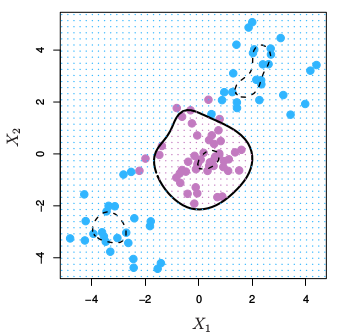


El valor de $\gamma$ controla el comportamiento del kernel, cuando es muy pequeño, el modelo final es equivalente al obtenido con un kernel lineal, a medida que aumenta su valor, también lo hace la flexibilidad del modelo.

Los kernels descritos son solo unos pocos de los muchos que existen. Cada uno tiene una serie de hiperparámetros cuyo valor óptimo puede encontrarse mediante validación cruzada. No puede decirse que haya un kernel que supere al resto, depende en gran medida de la naturaleza del problema que se esté tratando. Ahora bien, tal como indican los autores de *A Practical Guide to Support Vector Classification*, es muy recomendable probar el kernel RBF. Este kernel tiene dos ventajas: que solo tiene dos hiperparámetros que optimizar ($\gamma$ y la penalización $C$ común a todos los SVM) y que su flexibilidad puede ir desde un clasificador lineal a uno muy complejo.

#### Ejemplo
Para el siguiente ejemplo se emplea un set de datos publicado en el libro Elements of Statistical Learning que contiene observaciones simuladas con una función no lineal en un espacio de dos dimensiones (2 predictores).



In [ ]:
%%R
# Descargan los datos. Requiere conexión a internet
load(url("https://web.stanford.edu/~hastie/ElemStatLearn/datasets/ESL.mixture.rda"))
##El objeto ESL.mixture cargado es una lista que contiene almacenados el valor de los dos predictores en el elemento x y el valor de la clase a la que pertenece cada observación en el elemento y.

           X1         X2 y
1  2.52609297  0.3210504 0
2  0.36695447  0.0314621 0
3  0.76821908  0.7174862 0
4  0.69343568  0.7771940 0
5 -0.01983662  0.8672537 0
6  2.19654493 -1.0230141 0


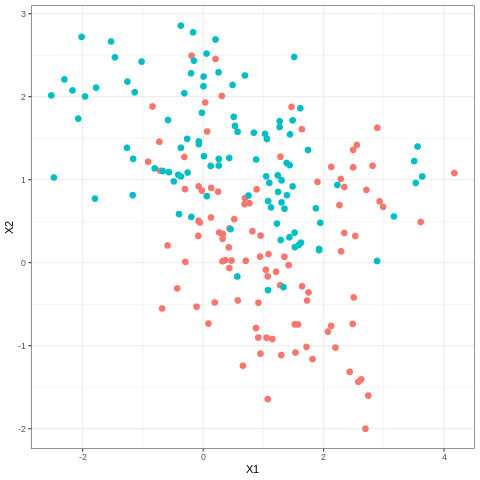

In [ ]:
%%R
datos <- data.frame(ESL.mixture$x, y = ESL.mixture$y)
# Al tratarse de un problema de clasificación se convierte la variable
# respuesta en factor
datos$y <- as.factor(datos$y)
print(head(datos))

ggplot(data = datos, aes(x = X1, y = X2, color = y)) +
  geom_point(size =2.5) +
  theme_bw() +
  theme(legend.position = "none")

Entre los kernel no lineales que acepta la función ``svm``(destacan  ``kernel = "polinomial"``, en cuyo caso hay que indicar el grado del polinomio $d$, y ``kernel = "radial"``, en cuyo caso hay que indicar el hiperparámetro parámetro $\gamma$. Además de los hiperparámetros propios de cada kernel, todo SVM tiene también el hiperparámetro de penalización $C$.

Identificación de hiperparámetros óptimos y ajuste del modelo

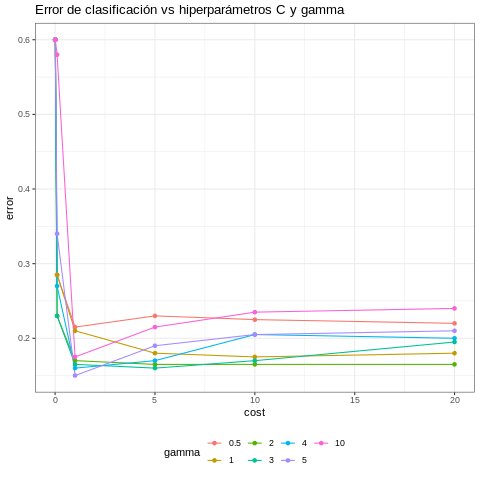

In [ ]:
%%R
# Como los datos se han simulado en una misma escala, no es necesario estandarizarlos
# si no fuese así, es muy importante hacerlo.
set.seed(1)
svm_cv <- tune("svm", y ~ X1 + X2, data = datos, kernel = 'radial',
               ranges = list(cost = c(0.001, 0.01, 0.1, 1, 5, 10, 20),
                             gamma = c(0.5, 1, 2, 3, 4, 5, 10)))

ggplot(data = svm_cv$performances, aes(x = cost, y = error, color = as.factor(gamma)))+
  geom_line() +
  geom_point() +
  labs(title = "Error de clasificación vs hiperparámetros C y gamma", color = "gamma") +
  theme_bw() +
  theme(legend.position = "bottom")

[1] "mejores parámetros: 1" "mejores parámetros: 5"

Call:
best.tune(method = "svm", train.x = y ~ X1 + X2, data = datos, ranges = list(cost = c(0.001, 
    0.01, 0.1, 1, 5, 10, 20), gamma = c(0.5, 1, 2, 3, 4, 5, 10)), 
    kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  133



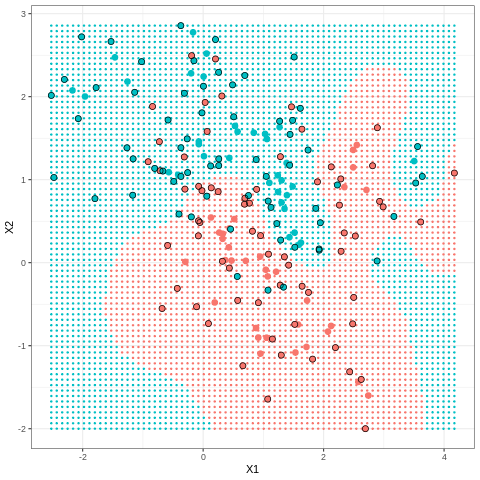

In [ ]:
%%R
print(paste("mejores parámetros:",svm_cv$best.parameters))
modelo_svm_rbf <- svm_cv$best.model
print(modelo_svm_rbf)

# Se interpolar puntos dentro del rango de los dos predictores X1 y X2.
# Estos nuevos puntos se emplean para predecir la variable respuesta acorde
# al modelo y así colorear las regiones que separa el hiperplano.

# Rango de los predictores
rango_X1 <- range(datos$X1)
rango_X2 <- range(datos$X2)

# Interpolación de puntos
new_x1 <- seq(from = rango_X1[1], to = rango_X1[2], length = 75)
new_x2 <- seq(from = rango_X2[1], to = rango_X2[2], length = 75)
nuevos_puntos <- expand.grid(X1 = new_x1, X2 = new_x2)

# Predicción según el modelo de los nuevos puntos
predicciones <- predict(object = modelo_svm_rbf, newdata = nuevos_puntos)

# Se almacenan los puntos predichos para el color de las regiones en un dataframe
color_regiones <- data.frame(nuevos_puntos, y = predicciones)

ggplot() +
  # Representación de las 2 regiones empleando los puntos y coloreándolos
  # según la clase predicha por el modelo
  geom_point(data = color_regiones, aes(x = X1, y = X2, color = as.factor(y)),
             size = 0.5) +
  # Se añaden las observaciones
  geom_point(data = datos, aes(x = X1, y = X2, color = as.factor(y)),
             size = 2.5) +
  # Se identifican aquellas observaciones que son vectores soporte
  geom_point(data = datos[modelo_svm_rbf$index, ],
             aes(x = X1, y = X2, color = as.factor(y)),
             shape = 21, colour = "black",
             size = 2.5) +
  theme_bw() +
  theme(legend.position = "none")

### *Support Vector Machines* para más de dos clases
El concepto de hiperplano de separación en el que se basan los SVMs no se generaliza de forma natural para más de dos clases. Se han desarrollado numerosas estrategias con el fin de aplicar este método de clasificación a situaciones con $k>2$-clases, de entre ellos, los más empleados son: one-versus-one, one-versus-all y DAGSVM.


**One-versus-one**

Supóngase un escenario en el que hay $K > 2$ clases y que se quiere aplicar el método de clasificación basado en SVMs. La estrategia de one-versus-one consiste en generar un total de $K(K-1)/2$ SVMs, comparando todos los posibles pares de clases. Para generar una predicción se emplean cada uno de los $K(K-1)/2$ clasificadores, registrando el número de veces que la observación es asignada a cada una de las clases. Finalmente, se considera que la observación pertenece a la clase a la que ha sido asignada con más frecuencia. La principal desventaja de esta estrategia es que el número de modelos necesarios se dispara a medida que aumenta el número de clases, por lo que no es aplicable en todos los escenarios.

Si a la función ``svm()`` recibe como variable respuesta un factor con más de dos niveles, realiza automáticamente una clasificación multi-clase empleando el método one-versus-one.

**DAGSVM**


DAGSVM (*Directed Acyclic Graph SVM*) es una mejora del método one-versus-one. La estrategia seguida es la misma, pero consiguen reducir su tiempo de ejecución eliminando comparaciones innecesarias gracias al empelo de una directed acyclic graph (DAG). Supóngase un set de datos con cuatro clases (A, B, C, D) y 6 clasificadores entrenados con cada posible par de clases (A-B, A-C, A-D, B-C B-D, C-D). Se inician las comparaciones con el clasificador (A-D) y se obtiene como resultado que la observación pertenece a la clase A, o lo que es equivalente, que no pertenece a la clase D. Con esta información se pueden excluir todas las comparaciones que contengan la clase D, puesto que se sabe que no pertenece a este grupo. En la siguiente comparación se emplea el clasificador (A-C) y se predice que es A. Con esta nueva información se excluyen todas las comparaciones que contengan C. Finalmente solo queda emplear el clasificador (A-B) y asignar la observación al resultado devuelto. Siguiendo esta estrategia, en lugar de emplear los 6 clasificadores, solo ha sido necesario emplear 3. DAGSVM tiene las mismas ventajas que el método one-versus-one pero mejorando mucho el rendimiento.

#### Ejemplo
El set de datos ``khan`` contiene información sobre 83 muestras pertenecientes a 4 tipos distintos de tumores. Para cada una de las muestras se dispone del perfil de expresión de 2308 genes. Se pretende crear un clasificador multiclase basado en SVMs que permita predecir el tipo de tumor en función de la expresión de los genes. El set de datos está dividido en training set (``xtrain``, ``ytrain``) y test set (``xtest``, ``ytest``), 63 observaciones destinadas a entrenamiento y 20 a la evaluación del modelo.



In [ ]:
%%R

data("Khan")
names(Khan)

print(dim(Khan$xtrain))
print(dim(Khan$xtest))
print(length(Khan$ytrain))
print(length(Khan$ytest))

[1]   63 2308
[1]   20 2308
[1] 63
[1] 20


En este tipo de escenario, en el que el número de predictores es varios órdenes de magnitud mayor que el de observaciones, los modelos son proclives a sufrir *overfitting*. Esto sugiere que, de entre los diferentes tipos de kernels, sea adecuado emplear el de menor flexibilidad, el kernel lineal. El único hiperparámetro de un SVM con kernel lineal es el valor de penalización $C$.



In [ ]:
%%R
# Como la variable respuesta está separa de los predictores, se unen en un único 
# dataframe. La variable respuesta tiene que ser de tipo factor.
datos_train <- data.frame( y = as.factor(Khan$ytrain), Khan$xtrain)

svm_cv <- tune("svm", y ~ ., data = datos_train, kernel = 'linear',
               ranges = list(cost = c(0.0001, 0.0005, 0.001, 0.01, 0.1, 1)))

ggplot(data = svm_cv$performances, aes(x = cost, y = error)) +
  geom_line() +
  geom_point() +
  labs(title = "Error de clasificación vs hiperparámetro C") +
  theme_bw()


  print(svm_cv$best.parameters)

  modelo_svm <- svm_cv$best.model
print(modelo_svm)

print(table(prediccion = modelo_svm$fitted, clase_real = datos_train$y))
# Aciertos del modelo con los datos de entrenamiento
print(paste("Error de entrenamiento:", 100*mean(datos_train$y != modelo_svm$fitted), "%"))

   cost
2 5e-04

Call:
best.tune(method = "svm", train.x = y ~ ., data = datos_train, ranges = list(cost = c(1e-04, 
    5e-04, 0.001, 0.01, 0.1, 1)), kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  5e-04 

Number of Support Vectors:  58

          clase_real
prediccion  1  2  3  4
         1  8  0  0  0
         2  0 23  0  0
         3  0  0 12  0
         4  0  0  0 20
[1] "Error de entrenamiento: 0 %"


El modelo obtenido tiene un training error del 0%, es capaz de clasificar correctamente todas las observaciones empleadas para crearlo. Un training error muy bajo puede ser un indicativo de overfitting, lo que haría que el modelo no fuese capaz de predecir correctamente nuevas observaciones. Para evaluar si es este el caso, se emplea el modelo para predecir las 20 observaciones del test set.

In [ ]:
%%R
datos_test <- data.frame(y = as.factor(Khan$ytest), Khan$xtest)
predicciones <- predict(object = modelo_svm, newdata = datos_test)

print(paste("Error de test:", 100 * mean(datos_test$y != predicciones), "%"))

print(table(prediccion = predicciones, clase_real = datos_test$y))

[1] "Error de test: 10 %"
          clase_real
prediccion 1 2 3 4
         1 3 0 0 0
         2 0 6 0 0
         3 0 0 4 0
         4 0 0 2 5


De las 20 observaciones de test, el modelo SVM con ``kernel = "linear"`` y ``cost = 10`` predice correctamente 18 y falla en 2, su test error es solo del 10%.

## Árbol de decisión condicional 
Ejemplo con datos de Iris: Ajuste de modelo y visualización


	 Conditional inference tree with 4 terminal nodes

Response:  Species 
Inputs:  Sepal.Length, Sepal.Width, Petal.Length, Petal.Width 
Number of observations:  120 

1) Petal.Length <= 1.9; criterion = 1, statistic = 111.826
  2)*  weights = 41 
1) Petal.Length > 1.9
  3) Petal.Width <= 1.6; criterion = 1, statistic = 53.506
    4) Petal.Length <= 4.8; criterion = 0.999, statistic = 12.882
      5)*  weights = 35 
    4) Petal.Length > 4.8
      6)*  weights = 6 
  3) Petal.Width > 1.6
    7)*  weights = 38 


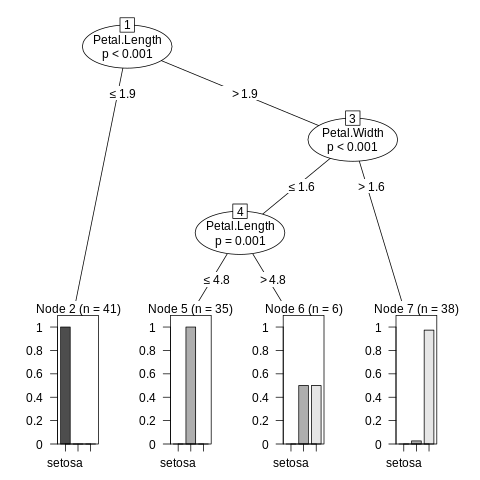

In [ ]:
%%R
cond_tree <- ctree(Species ~ .,  data = train, 
                  controls = ctree_control(mincriterion = 0.95,
                                            minbucket = 5))

print(cond_tree)
plot(cond_tree)

Predicción y matriz de confusión

In [ ]:
%%R
part_pred = predict(part_tree, newdata = test, type = "class")

cond_pred = predict(cond_tree, newdata = test, type = "response")
print(confusionMatrix(test$Species, part_pred))
print(confusionMatrix(test$Species, cond_pred))

     [,1] [,2]
[1,]    0    0
[2,]    0    9
     [,1] [,2]
[1,]    0    0
[2,]    0    9
